In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/MindBigData.csv')

Data.tail()

,FP1,-1,-919,-917,-901,-885,-907,-907.1,-891,-893,...,599,596.1,595.1,320,589.2,573.1,566.1,564,556,555.2
163926,TP9,9,571,545,541,539,546,547,541,537,...,521,529,533,525,522,527,530,526,523,524
163927,TP9,9,583,537,539,536,534,533,532,535,...,456,458,457,466,469,476,482,473,458,462
163928,TP9,9,593,246,241,243,249,250,242,241,...,537,547,551,543,533,538,544,541,533,531
163929,TP9,9,618,1122,1123,1122,1122,1122,1121,1113,...,500,497,498,500,503,497,484,484,495,495
163930,TP9,9,634,647,640,641,653,648,640,641,...,578,585,591,588,578,580,587,590,582,572


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Set labels for data
data = Data.iloc[:, 2:].values
labels = Data.iloc[:, 1].values

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshaping the Data to be fed into the Model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# printing the shapes of the data
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (131144, 408, 1)
X_test shape:  (16393, 408, 1)
y_train shape:  (131144, 11)


Epoch 1/100
4099/4099 [==============================] - 49s 11ms/step - loss: 2.2253 - accuracy: 0.2701 - val_loss: 2.1159 - val_accuracy: 0.2644
Epoch 2/100
4099/4099 [==============================] - 44s 11ms/step - loss: 2.0953 - accuracy: 0.2730 - val_loss: 2.0786 - val_accuracy: 0.2644
Epoch 3/100
4099/4099 [==============================] - 44s 11ms/step - loss: 2.0671 - accuracy: 0.2785 - val_loss: 2.0541 - val_accuracy: 0.2808
Epoch 4/100
4099/4099 [==============================] - 41s 10ms/step - loss: 2.0493 - accuracy: 0.2836 - val_loss: 2.0434 - val_accuracy: 0.2835
Epoch 5/100
4099/4099 [==============================] - 41s 10ms/step - loss: 2.0324 - accuracy: 0.2891 - val_loss: 2.0226 - val_accuracy: 0.2933
Epoch 6/100
4099/4099 [==============================] - 41s 10ms/step - loss: 2.0136 - accuracy: 0.2934 - val_loss: 2.0064 - val_accuracy: 0.2858
Epoch 7/100
4099/4099 [==============================] - 43s 10ms/step - loss: 1.9934 - accuracy: 0.2958 - val_loss: 1

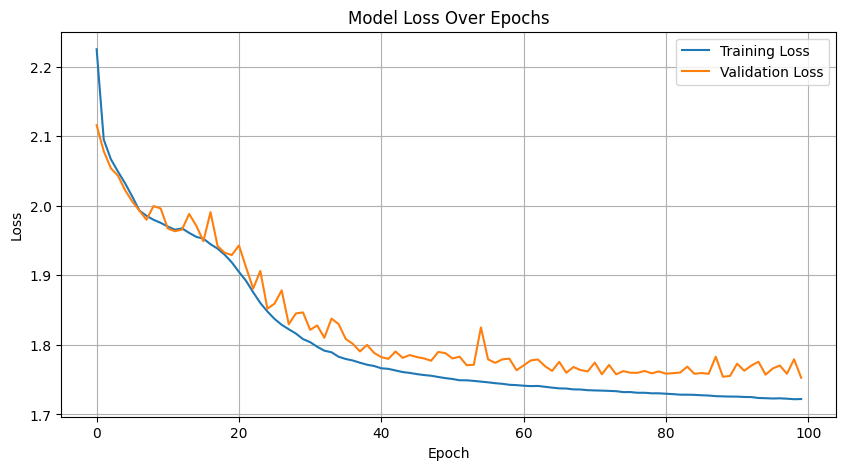

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 405, 64)           320       
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 202, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 199, 128)          32896     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 99, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 94, 128)           98432     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 47, 128)          

In [ ]:
# First Convolutional Layer
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Second Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=4, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Third Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=6, activation='relu')) #Additional kernel with larger kernel size
model.add(MaxPooling1D(pool_size=2))

# First LSTM Layer
model.add(LSTM(80,return_sequences=True))

# Second LSTM Layer
model.add(LSTM(80))

# First Dense Layer
model.add(Dense(64, activation='relu'))

# Second and Final Dense Layer
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Saving the model's loss and accuracy for plotting
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('/content/drive/MyDrive/model_loss_plot.png')
plt.show()
# Model Summary and Architecture
print(model.summary())


# Run test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')